In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

# There is no plan bee without them 🐝

## Abstract
Pollinators around the world play a central role in our agriculture with an estimated economic benefit of €235bn per year. Up to 75% of our crops are dependent on pollination and honeybees account for most of it. Yet, in Europe and the USA the bee population has been declining at an alarming rate during the last decades. As by-hand pollination is not an alternative, it is impossible to imagine a world without them. [1]

With this project, we first aim at giving insights about the state of bee health and honey produced and traded using the [FAO datasets](http://www.fao.org/faostat/en/#data). Secondly, we focus on the USA using results from [US Departement of Agriculture](https://quickstats.nass.usda.gov/) in order to identify and present the main factors of bee decline. Finally, we propose a case study about almonds in California to show the consequences of a lack of bees.

[[1](http://sos-bees.org/wp-content/uploads/2014/04/BeesInDecline.pdf)] *Bees in Decline*, Greenpeace, 2013



## 1. How do the continents compare in terms of bee decline from 1961 to these days?

Robin

## 2. How do changes in honey production relate to number of beehives in Europe and the USA?

Robin

## 3. What are the consequences of bee decline on the patterns of honey import/export around the world?

Eric

For this data analysis, we will plot time series in order to make comparisons. The two following functions are build to do it.

In [2]:
#Take one time serie and plot
def plot_time_serie(df, ylabel="", xlabel="", title=""):
    fig, ax = plt.subplots(figsize=(15,6))
    ax.plot(df, linestyle='-')
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_xlim(df.index.min(), df.index.max())
    plt.show()

In [3]:
#Take multiple time series and plot them together
def plot_time_series(df, names, ylabel="", xlabel="", title=""):
    fig, ax = plt.subplots(figsize=(15,6))
    dfs =[df[name] for name in names]
    for df, name in zip(dfs, names):
        ax.plot(df, linestyle='-', label=name)
        ax.set_xlim(df.index.min(), df.index.max())
    ax.set_ylabel(ylabel)
    ax.legend(loc='upper left')
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    plt.show()

We decided to take a look on exchanges of honey and beehives through the last decades. We will thus use the FAOSTAT_Trade_Matrix on the honey and beehives fields and the FAOSTAT_Livestock_Primary dataset in complement for our future analysis.

Side note: The FAO datasets are unreadable with the default pandas encoding utf-8 since they are encoded in latin_1, we must notify it when we read them.

In [4]:
trade_matrix = pd.read_csv("data/FAOSTAT_Trade_Matrix.csv", encoding="latin_1")
honey_production_raw = pd.read_csv("data/FAOSTAT_Livestock_Primary.csv", encoding="latin_1")

Let's first take a look at the total production of honey .

In [5]:
honey_production = honey_production_raw[(honey_production_raw["Item"] == "Honey, natural") & (honey_production_raw["Unit"] == "tonnes")]
honey_production = honey_production[["Area", "Year", "Value"]]
honey_production = honey_production.rename(columns={"Area": "Country", "Value": "Production Value"})

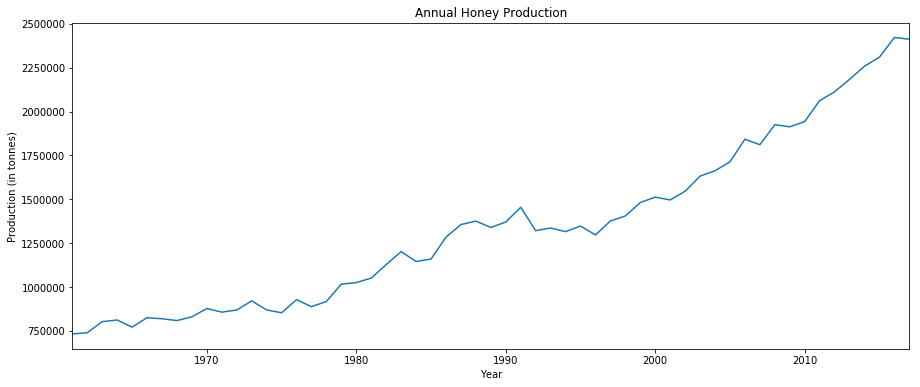

In [6]:
honey_year_production = honey_production.groupby("Year")["Production Value"].sum()
plot_time_serie(honey_year_production, 'Production (in tonnes)', 'Year', 'Annual Honey Production')

We can observe that the honey production increased ("linearly") since the 60s. 

Now let's see the Trade matrix.

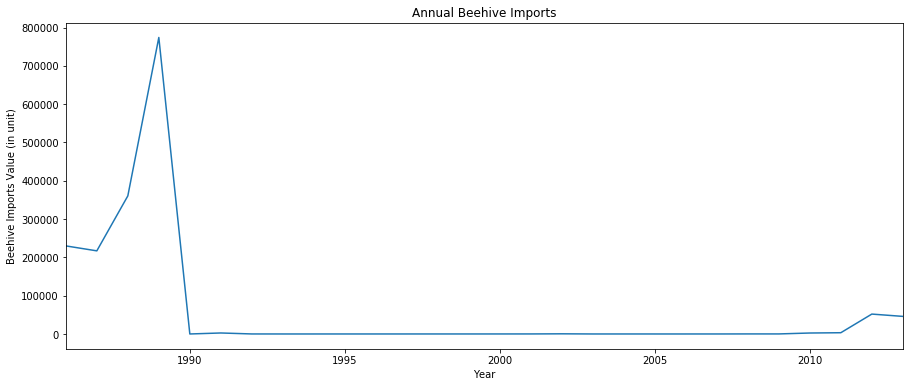

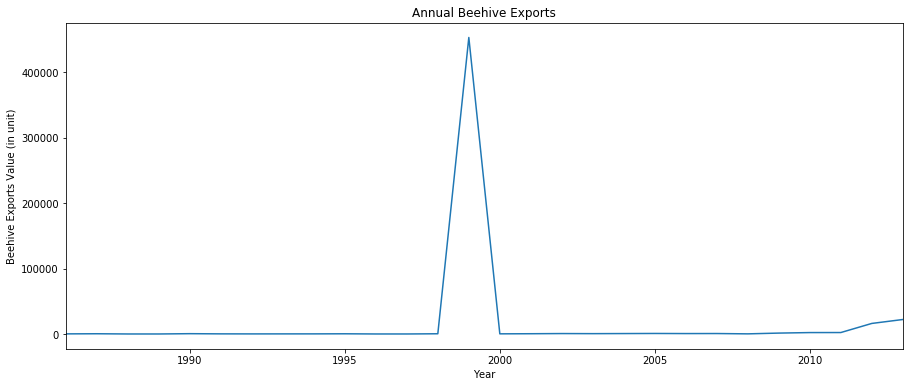

In [7]:
beehives = trade_matrix[(trade_matrix["Item"] == "Beehives")]

beehives_imports = beehives[(beehives["Element"] == "Import Quantity")]
imports = beehives_imports.groupby("Year").sum()["Value"]
plot_time_serie(imports, 'Beehive Imports Value (in unit)', 'Year', 'Annual Beehive Imports')

beehives_exports = beehives[(beehives["Element"] == "Export Quantity")]
exports = beehives_exports.groupby("Year").sum()["Value"]
plot_time_serie(exports, 'Beehive Exports Value (in unit)', 'Year', 'Annual Beehive Exports')

#beehives_imports = beehives[(beehives["Element"] == "Import Value")]
#imports = beehives_imports.groupby("Year").sum()["Value"]
#plot_time_serie(imports, 'Beehive Imports Value (in 1000 US$)', 'Year', 'Annual Beehive Imports')
#
#beehives_exports = beehives[(beehives["Element"] == "Export Value")]
#exports = beehives_exports.groupby("Year").sum()["Value"]
#plot_time_serie(exports, 'Beehive Exports Value (in 1000 US$)', 'Year', 'Annual Beehive Exports')

In [8]:
Albania_Macedonia_beehives_trades = beehives[(beehives["Reporter Countries"] == 'Albania') & (beehives["Partner Countries"] == 'North Macedonia') & (beehives["Value"] > 0) & (beehives["Year"] == 2009)]
print(f"We have {Albania_Macedonia_beehives_trades.shape[0]} link between Albania and North Macedonia.")
Albania_Macedonia_beehives_trades


We have 1 link between Albania and North Macedonia.


,Domain Code,Domain,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
289,TM,Detailed trade matrix,3,Albania,154,North Macedonia,5622,Import Value,1181,Beehives,2009,2009,1000 US$,2,NaN,Official data


We should expect the same value of Import and Export beehives per year, which is not the case here (See figures above). We would expect symmetrical behaviour (if export from A to B then import from B to A), then Beehives Exports and imports can not be used here. 


In [9]:
honey = trade_matrix[trade_matrix["Item"] == "Honey, natural"]

honey_imports = honey[honey["Element"] == "Import Quantity"]
honey_imports = honey_imports[["Reporter Countries", "Year", "Value"]]
honey_imports = honey_imports.rename(columns={"Reporter Countries": "Country", "Value": "Import Value"})

honey_exports = honey[honey["Element"] == "Export Quantity"]
honey_exports = honey_exports[["Reporter Countries", "Year", "Value", "Partner Countries"]]
honey_exports = honey_exports.rename(columns={"Reporter Countries": "Country", "Value": "Export Value"})

We will focus our analysis on the honey exports and imports since the data seems more usable.

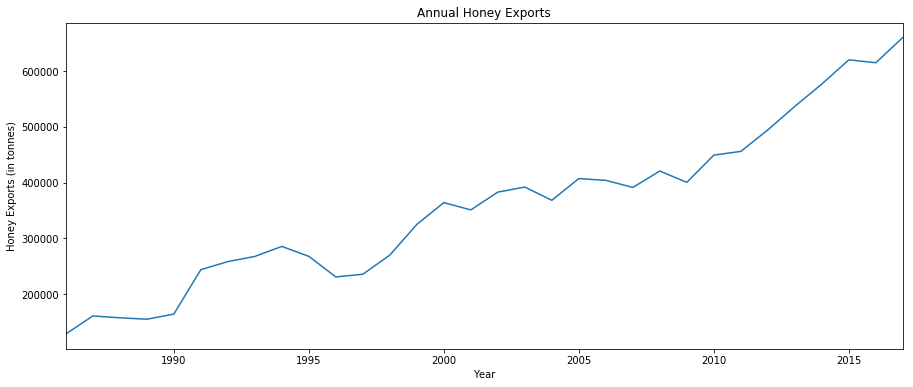

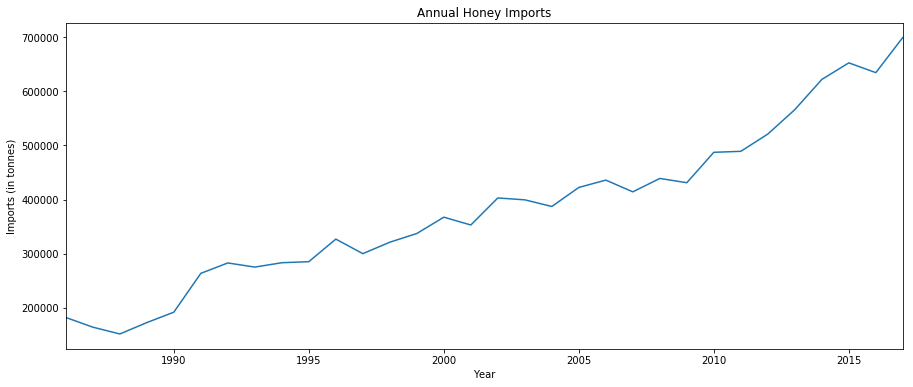

In [10]:
exports = honey_exports.groupby(["Year"]).sum()
plot_time_serie(exports, 'Honey Exports (in tonnes)', 'Year', 'Annual Honey Exports')
imports = honey_imports.groupby(["Year"]).sum()
plot_time_serie(imports, 'Imports (in tonnes)', 'Year', 'Annual Honey Imports')

The two curves look similar, we will thus make our anylsis on the honey imports and exports.

In [11]:
exports_country = honey_exports.groupby(["Year", "Country"]).agg('sum')
imports_country = honey_imports.groupby(["Year", "Country"]).agg('sum')

In [12]:
exports_country

Export Value
Year Country                                         
1986 Argentina                                  18601
     Australia                                   9536
     Austria                                       82
     Belgium-Luxembourg                          1553
     Belize                                       249
...                                               ...
2017 Uruguay                                     9166
     Venezuela (Bolivarian Republic of)             6
     Yemen                                        362
     Zambia                                       829
     Zimbabwe                                       0

[2947 rows x 1 columns]

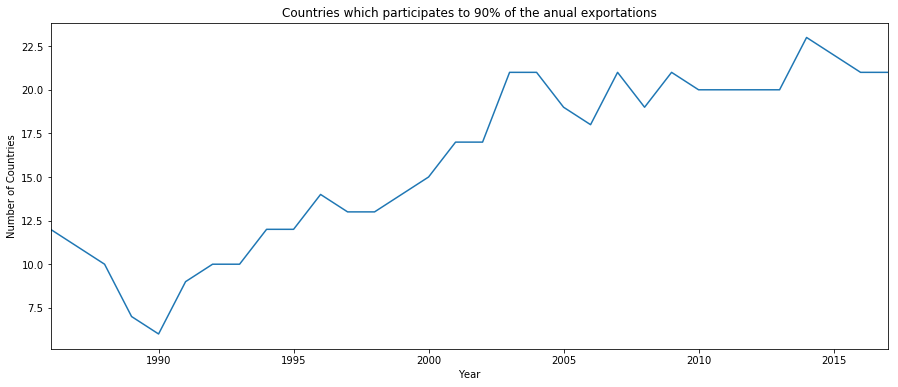

In [13]:
top_exporters = exports_country.copy()
top_exporters.reset_index(inplace=True) 
top_exporters['ratio'] = top_exporters["Export Value"] / top_exporters['Export Value'].groupby(top_exporters['Year']).transform('sum')
top_exporters = top_exporters.sort_values("ratio", ascending = False)
top_exporters["cumulative sum"] = top_exporters["ratio"].groupby(top_exporters['Year']).transform('cumsum')

top_exporters = top_exporters[top_exporters["cumulative sum"]<0.9]
best_exporters = top_exporters.groupby("Year")["Country"]
plot_time_serie(best_exporters.count(), ylabel="Number of Countries", xlabel="Year", title="Countries which participates to 90% of the anual exportations")

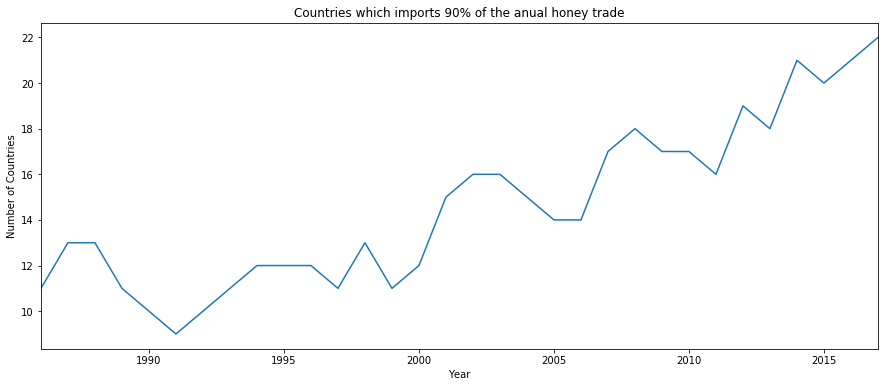

In [14]:
top_importers = imports_country.copy()
top_importers.reset_index(inplace=True) 
top_importers['ratio'] = top_importers["Import Value"] / top_importers['Import Value'].groupby(top_importers['Year']).transform('sum')
top_importers = top_importers.sort_values("ratio", ascending = False)
top_importers["cumulative sum"] = top_importers["ratio"].groupby(top_importers['Year']).transform('cumsum')

top_importers = top_importers[top_importers["cumulative sum"]<0.9]
best_importers = top_importers.groupby("Year")["Country"]
plot_time_serie(best_importers.count(), ylabel="Number of Countries", xlabel="Year", title="Countries which imports 90% of the anual honey trade")

We can notice that we have a dynamic market with more countries which need honey, and more producer of this honey.

In [15]:
new_df = pd.merge(honey_production, exports_country,  how='inner', left_on=['Year','Country'], right_on = ['Year','Country'])
new_df = pd.merge(new_df, imports_country,  how='inner', left_on=['Year','Country'], right_on = ['Year','Country'])
new_df["Honey Consumption"] = new_df["Production Value"] - new_df["Export Value"] + new_df["Import Value"]
new_df["Balance"] = new_df["Export Value"] - new_df["Import Value"]
new_df = new_df.set_index('Year')

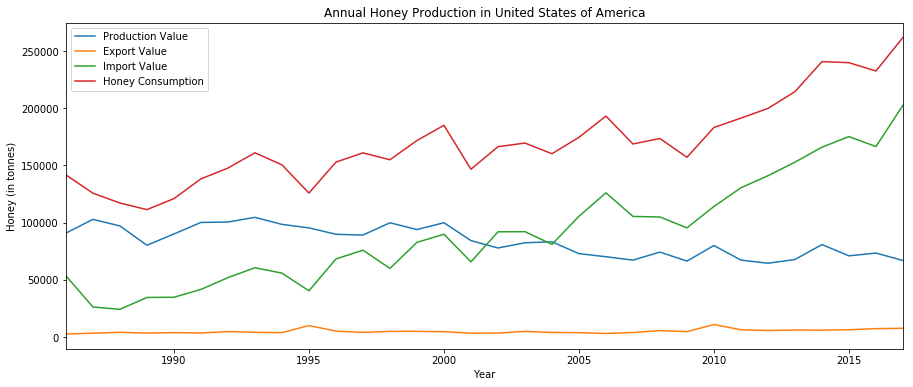

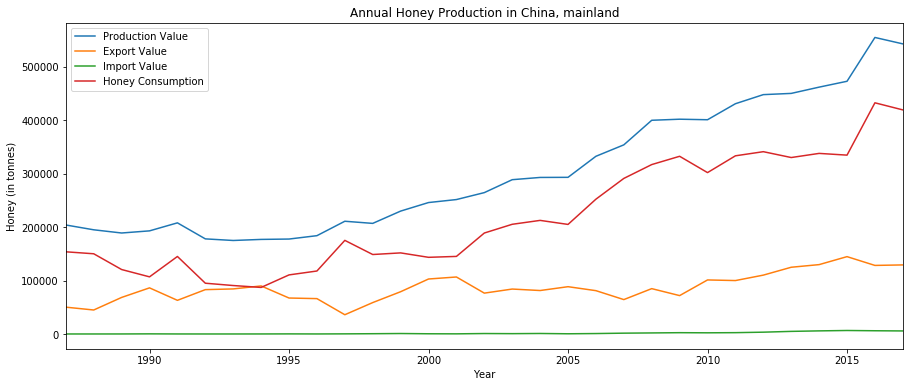

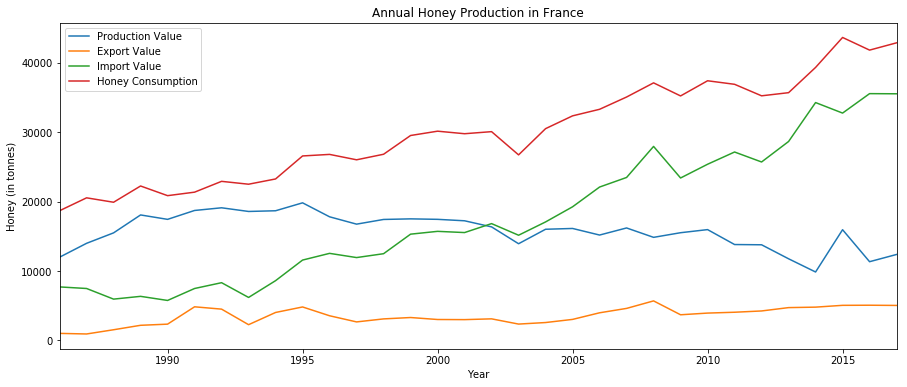

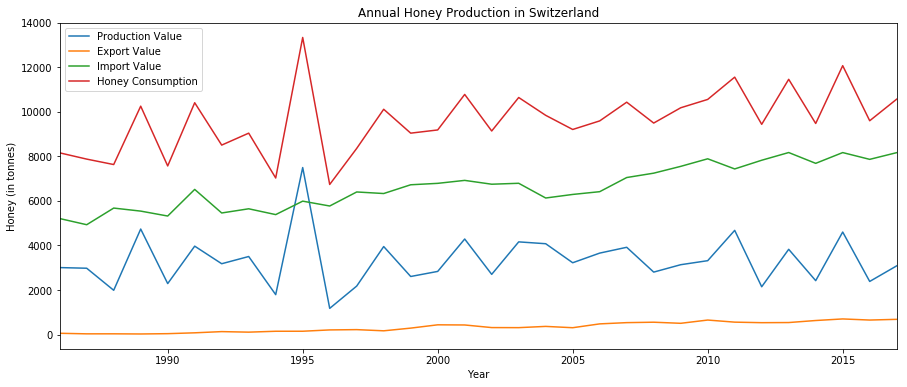

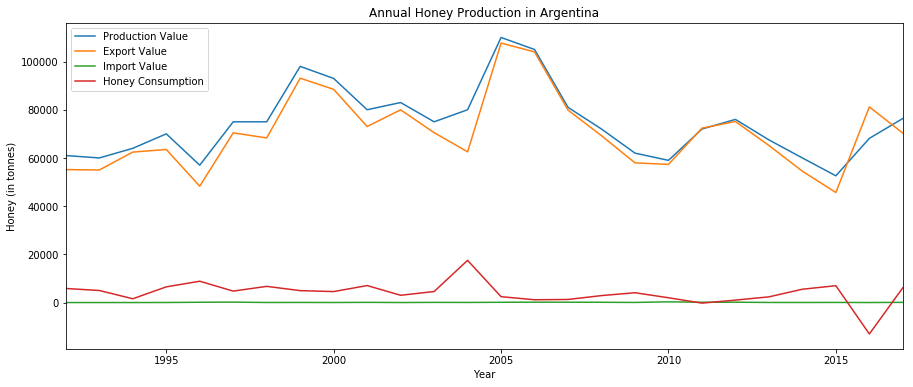

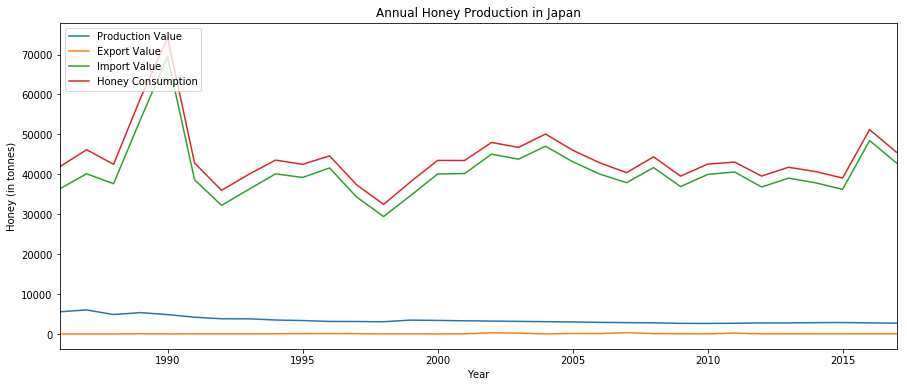

In [16]:
names = ["Production Value", "Export Value", "Import Value", "Honey Consumption"]
countries = ["United States of America", "China, mainland", "France", "Switzerland", "Argentina", "Japan"]
for country in countries:
    country_honey = new_df[new_df["Country"] == country]
    plot_time_series(country_honey, names,'Honey (in tonnes)', 'Year', f'Annual Honey Production in {country}')
plt.show()

We can observe 3 different kind of countries:
the countries which export the greater part of their honey production (Argentina)
the countries which import the greater part of their honey (France, USA, Japan)
the countries which use the greater part of their honey (China)

In [17]:
top_exports_country_year = top_exporters.groupby("Year").apply(lambda x: x.nlargest(5,['ratio']))
top_imports_country_year = top_importers.groupby("Year").apply(lambda x: x.nlargest(5,['ratio']))

In [18]:
top_exports_country_year[top_exports_country_year["Year"] == 2016]

Year          Country  Export Value     ratio  cumulative sum
Year                                                                    
2016 2703  2016  China, mainland        128326  0.208718        0.208718
     2679  2016        Argentina         81175  0.132028        0.340746
     2801  2016          Ukraine         56968  0.092656        0.433402
     2734  2016            India         35792  0.058214        0.491616
     2758  2016           Mexico         29097  0.047325        0.538942

In [19]:
top_imports_country_year[top_imports_country_year["Year"] == 2016]

Year                   Country  Import Value     ratio  \
Year                                                                
2016 3466  2016  United States of America        166479  0.262416   
     3374  2016                   Germany         83926  0.132290   
     3391  2016                     Japan         48445  0.076362   
     3464  2016            United Kingdom         39949  0.062970   
     3370  2016                    France         35568  0.056065   

           cumulative sum  
Year                       
2016 3466        0.262416  
     3374        0.394706  
     3391        0.471068  
     3464        0.534039  
     3370        0.590104

The world is divided between producer and consumer.

#### Matrix Exploration

We now want to explore the entire trade matrix through years. We first decided to do so with folium, however we prefered to use leaflet (javascript) to have more interactivity (It will be nice for our data story).
The goal of this vissualisation is to see which country has which connection with others through time.

In [20]:
#transform a dict into a javascript file compatible with our visualisation
def json_to_js(json_, name):
    f = open(f"exportations_graph/main/data/{name}.js", "w+")
    f.write(f"var {name} = ")
    f.write(str(json_))
    f.write(";")
    f.close()

In [21]:
honey_exports = honey_exports[~(honey_exports == 0).any(axis=1)]

For the moment we will select a year, in the future we will have all years int the visualisation.

In [22]:
year = 2014

In [23]:
honey_exports = honey_exports[honey_exports["Year"] == year]
value_per_country = honey_exports[["Country", "Export Value"]].groupby(["Country"]).agg('sum')
#print (honey_exports[honey_exports["Export Value"] == honey_exports["Export Value"].max()])
value_per_country = value_per_country.to_dict()["Export Value"]

To plot our matrix on a map, we need the borders of each Countries (available in data/countries.geo.json) and the position of the capitals of each country (available in data/capitals.json) to define the begining and the end of each matrix arrow.

In [24]:
countries = json.loads(open('data/countries.geo.json').read())
countries = countries["features"]

capitals = json.loads(open('data/capitals.json').read())
capitals = capitals["features"]

In [25]:
capitals_dict = {}
for capital in capitals:
    capitals_dict[capital["properties"]["country"]] = capital["geometry"]["coordinates"]

The major issue with joining these datasets was the country naming. Indeed since they don't come from the same source, we have different name for the same country (e.g. Russia vs. Russian Federation).

In [26]:
transforms = {
    "The Bahamas": "Bahamas",
    "Republic of the Congo": "Congo Republic",
    "Democratic Republic of the Congo": "Congo Democratic Republic",
    "Guinea Bissau":"Guinea-Bissau",
    "South Korea": "Korea South",
    "North Korea": "Korea North",
    "Republic of Serbia" : "Serbia",
    "United Republic of Tanzania" : "Tanzania",
    "United States of America" : "United States"     
             }

transforms_pd = {
    "The Bahamas": "Bahamas",
    "Ivory Coast": "Côte d'Ivoire",
    "Republic of Serbia" : "Serbia",
    "Republic of the Congo": "Congo Republic",
    "Democratic Republic of the Congo": "Congo Democratic Republic",
    "Guinea Bissau":"Guinea-Bissau",
    "South Korea": "Republic of Korea",
    "North Korea": "Korea North",
    "Dominican Republic":'Dominica',
    "Russia" : "Russian Federation",
    "Czech Republic": "Czechia",
    "Bolivia" : "Bolivia (Plurinational State of)",
    "China" : "China, mainland",
    "Macedonia" : "North Macedonia",
    "Iran" : "Iran (Islamic Republic of)",
    "East Timor": "Timor-Leste",
    "Taiwan" : "China, Taiwan Province of",
    "Moldova" : "Republic of Moldova",
    "Vietnam": "Viet Nam",
    "Syria":"Syrian Arab Republic",
    "Brunei":"Brunei Darussalam"
             }

inv_transforms_pd = {v: k for k, v in transforms_pd.items()}

def transform(country, transforms):
    return transforms.get(country, country)

In [27]:
debug = False
countries_json = []
existing_country = []
for elem in countries:
    country = elem["properties"]["name"]
    existing_country.append(country)
    if (transform(country, transforms) not in capitals_dict):
        if debug:
            print(country+" has capital")
        continue
    elif transform(country, transforms_pd) not in value_per_country :
        if debug:
            print(country + " not export")
        elem["location"] = capitals_dict[transform(country, transforms)]
    else:
        elem["location"] = capitals_dict[transform(country, transforms)]
        elem["value"] = value_per_country[transform(country, transforms_pd)]
    countries_json.append(elem)
    

In [28]:
exp = honey_exports[["Country", "Partner Countries", "Export Value"]]
exportations_json = []
for i in exp.values.tolist():
    if transform(i[0], inv_transforms_pd) in existing_country and transform(i[1], inv_transforms_pd) in existing_country:
        exportations_json.append({"from":transform(i[0], inv_transforms_pd), "to":transform(i[1], inv_transforms_pd), "Value":i[2],})
    elif debug :
        print (i[0], i[1])

In [29]:
json_to_js(countries_json, "countries")
json_to_js(exportations_json, "exportations")

You can see the result of the visualsation [here](exportations_graph/main/html/honey_graph.html). You can click on a country to see links to others.

## 4. What is the relation between US cases of Colony Collapse Disorder and the main factors of CCD?

Arthur

## 5. California accounts for 80% of the world almond production, what is the impact of bees on this industry in the 21st century?

Tim & Arthur